# Read and plot output Crocus files
 Marie Dumont and Matthieu Lafaysse, Feb. 2018 

In [22]:
# modules import
from pylab import *
import netCDF4
from pathlib import Path
### adjust to your local git snowtoll repository
sys.path.append('/home/anselm/Seafile/diss/software/python_source_code/SSWS/SSWS_notebook_clean/snowtools_git')
from plots.proReader import ProReader

In [23]:
## input file name
#home = str(Path.home())
### set home to your path
home = '/home/anselm'
### where are the Crocus input files stored?
folder='/Seafile/diss/io/Col_de_Lautaret/Crocus/'
col_porte='PRO_1994100101_1995100100_24h.nc' # example from Col de Porte
### different crocus parameterisations
###b92, c13, f06 (last one advise from Marie)
parameterisation='b92'
input_file=home+folder+'PRO_2017080106_2018021706_'+parameterisation+'.nc'

In [28]:
### display variable names
crocus=netCDF4.Dataset(input_file) # classic opening of netCDF file
#WSN_T_ISBA = SWE (time, Number_of_Tile, Number-of_points)
#DSN_T_ISBA = Snow depth (time, Number_of_Tile, Number-of_points)
# print crocus.variables
massif=crocus.variables['massif_num']             #15 is Oisans; 
elevation=crocus.variables['ZS']
aspect=crocus.variables['aspect']
slope=crocus.variables['slope']
### select number between 0 and 35 and see what combination you got. For investigation maybe usefull to see the netcdf file
### with a simple netcdf viewer like ncview (linux command line)
point_of_interest=19
information_poi ="massif: ", massif[point_of_interest], " elevation: ", elevation[point_of_interest], " aspect: ", aspect[point_of_interest], " slope: ", slope[point_of_interest]
print information_poi

('massif: ', 16, ' elevation: ', 2100.0, ' aspect: ', 0.0, ' slope: ', 20.0)


In [10]:
### Load pro file
pro=ProReader(input_file,point=point_of_interest) # add point argument if several points (,point=i)

Lecture fichier /home/anselm/Seafile/diss/io/Col_de_Lautaret/Crocus/PRO_2017080106_2018021706_b92.nc
Point 0 selectionne

Fill data with 0 for variable SNOWHEAT (old method)
Fill data with 0 for variable SNOWLIQ
Fill data with 0 for variable SNOWGRAN2 (old method)
Fill data with 0 for variable SNOWGRAN1 (old method)
Fill data with 0 for variable SNOWAGE (old method)
Fill data with 0 for variable SNOWRAM
Fill data with np.nan for variable WSN_VEG (old method)
Fill data with 0 for variable SNOWHIST (old method)
Fill data with 0 for variable SNOWSPHER
Fill data with 0 for variable SNOWTYPE
Fill data with 0 for variable SNOWTEMP
Fill data with 0 for variable SNOWRO (old method)
Fill data with 0 for variable SNOWSIZE
Fill data with 0 for variable SNOWSSA
Fill data with 0 for variable SNOWDZ
Fill data with 0 for variable SNOWSHEAR
Fill data with 0 for variable SNOWDEND


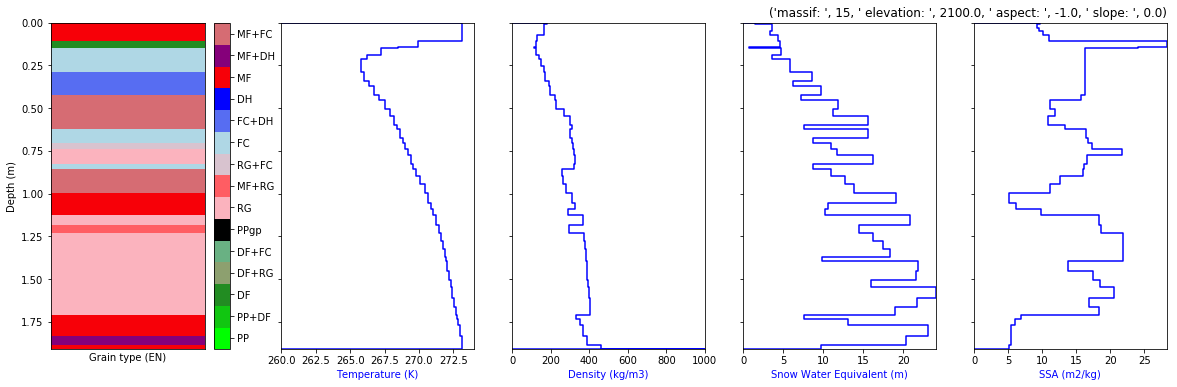

In [11]:
### display snow variable profiles for a given date
import matplotlib.pyplot as plt
### names of needed variables: names are the one important for the ProReader obejct, nemaes in brackets are the correcponding
### ones if you use the netCDF4.Dataset and their full description 
### grain (SNOWTYPE; snow layer grain type)
### ep (SNOWDZ; snow layer thickness); temp (SNOWTEMP; snow temp layer)
### rho (SNOWRHO; snow desnity); swe (WSN_VEG; snow water equivalent layer), ssa (SNOWSSA; snow layer specific surface area)
### plot infos about aspect.ele etc in plot
### print total snow resevoir; total depth and surface temperature in plot?(dsn_t_iba; total snow depth) (WSN_T_ISBA; total snow resevoir); (TS_ISBA; surface temperature)
# possible var values are : tel, ram, age, swe, rho, ... 
output_path=home+folder
### select date
date='2018021518'
output_file1=output_path+date+'-'+parameterisation+'-point_of_interest_'+str(point_of_interest)+'-grain_temperature_density_swe_ssa'

fig, axes = plt.subplots(1, 5, sharex=False, sharey=True, figsize=(20,6))
pro.plot_date(axes[0], "grain", date=date)
depth, temp = pro.plot_date(axes[1], "temp", date=date)
depth2, rho = pro.plot_date(axes[2], "rho", date=date)
depth3, swe = pro.plot_date(axes[3], "swe", date=date)
depth4, ssa = pro.plot_date(axes[4], "ssa", date=date)
axes[1].set_xlim(260,274)
axes[2].set_xlim(0,1000)
axes[0].set_ylabel('Depth (m)')
plt.title(information_poi,loc='right')
plt.show()
### for save plots comment plt.show() and uncomment next two lines; same for development plots
#plt.savefig(output_file1+'.png')
#plt.savefig(output_file1+'.svg')

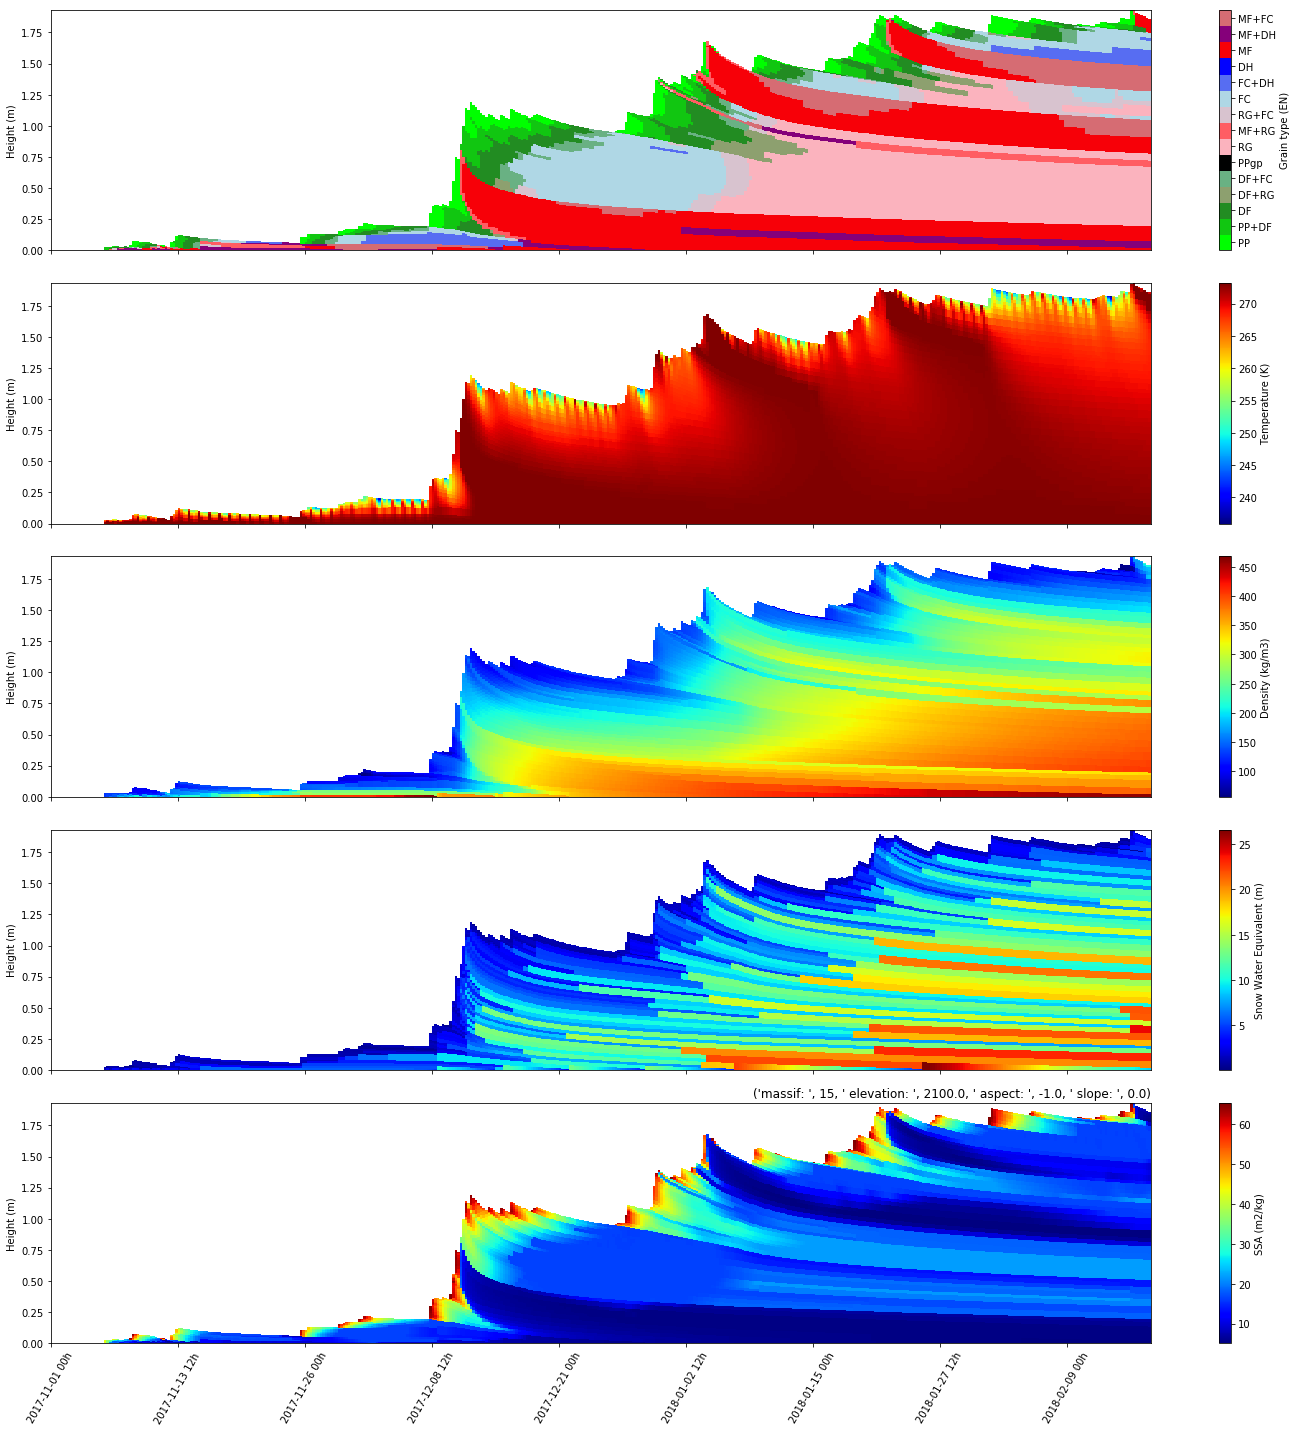

In [21]:
## display the seasonnal evolution of one variable
begin="2017110100"
end="2018021700"

fig, axes = plt.subplots(5, 1, sharex=True, sharey=False, figsize=(20,20)) ###figsize=(20,6))
plt.title(information_poi,loc='right')
pro.plot(axes[0], "grain", b=begin,e=end)
pro.plot(axes[1], "temp", b=begin,e=end)
pro.plot(axes[2], "rho", b=begin,e=end)
pro.plot(axes[3], "swe", b=begin,e=end)
pro.plot(axes[4], "ssa", b=begin,e=end)

## possible variables to plot : tel, ram, age, swe, temp, ...
plt.show()

output_path=home+folder
output_file1=output_path+date+'-'+parameterisation+'-point_of_interest_'+str(point_of_interest)+'-grain_temperature_density_swe_ssa'

#plt.savefig(output_file1+'.png')
#plt.savefig(output_file1+'.svg')

In [14]:
### display numerical value in the netCDF file


print "depth array", depth
print "temperature array", temp

depth array [0.         0.         0.00786467 0.00786467 0.02920046 0.02920046
 0.05143477 0.05143477 0.07188079 0.07188079 0.10490766 0.10490766
 0.14306131 0.14306131 0.14968307 0.14968307 0.18819631 0.18819631
 0.21476861 0.21476861 0.25445882 0.25445882 0.2902048  0.2902048
 0.34000458 0.34000458 0.37263339 0.37263339 0.42171821 0.42171821
 0.45397276 0.45397276 0.50618712 0.50618712 0.54799596 0.54799596
 0.60027516 0.60027516 0.62493875 0.62493875 0.67730384 0.67730384
 0.705622   0.705622   0.7401879  0.7401879  0.77670798 0.77670798
 0.82682444 0.82682444 0.85445056 0.85445056 0.89719546 0.89719546
 0.94576654 0.94576654 0.9953463  0.9953463  1.05713557 1.05713557
 1.08965813 1.08965813 1.12517743 1.12517743 1.18241991 1.18241991
 1.23196711 1.23196711 1.27542792 1.27542792 1.32171154 1.32171154
 1.36970606 1.36970606 1.39534642 1.39534642 1.45208084 1.45208084
 1.50774046 1.50774046 1.54840023 1.54840023 1.60912983 1.60912983
 1.66337616 1.66337616 1.71017636 1.71017636 1.7329